Penjelasan terdapat pada laporan pengerjaan.

# Import Libary

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import random as rnd
from scipy import stats
import copy 
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine-learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Import File

In [2]:
training = pd.read_csv('D:/Dataset/findit/hotel_bookings.csv')

In [3]:
training

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
#training[training.duplicated(keep=False)]

In [5]:
string = 'Jumlah missing value {}'
print(string.format('data training'), '\n', training.isnull().sum())

Jumlah missing value data training 
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent               

In [6]:
#solving missing value
training.children.fillna(value=0.0, inplace=True)
training.company.fillna(value=0.0, inplace=True)
training.agent.fillna(value=0.0, inplace=True)
training.country.fillna(value='Unknown', inplace=True)
training["meal"].replace("Undefined", "SC", inplace=True)

In [7]:
training.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
adult = training[training.adults == 0]
child = adult[adult.children == 0]
baby = child[child.babies == 0]
baby[['adults', 'children', 'babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


In [9]:
# delete no information column
zero_guests = list(training.loc[training["adults"]
                   + training["children"]
                   + training["babies"]==0].index)
training.drop(training.index[zero_guests], inplace=True)
training.reset_index(drop=True, inplace=True)

In [10]:
training["adr_pp"] = training["adr"] / (training["adults"] + training["children"])

In [11]:
rh = training.loc[(training["hotel"] == "Resort Hotel") & (training["is_canceled"] == 0)]
ch = training.loc[(training["hotel"] == "City Hotel") & (training["is_canceled"] == 0)]
training_nc = training[(training["is_canceled"] == 0)]

In [12]:
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

## EDA

### 1. Agent

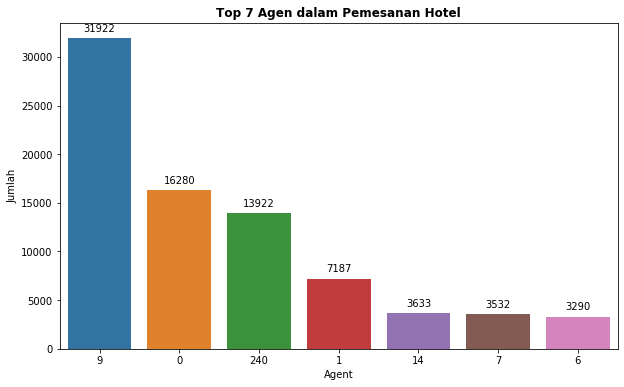

In [13]:
training.agent = training.agent.astype(int)
plt.figure(figsize=(10, 6))
splot = sns.countplot('agent', data=training, order=training.agent.value_counts().iloc[:7].index)

plt.title('Top 7 Agen dalam Pemesanan Hotel', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Agent')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

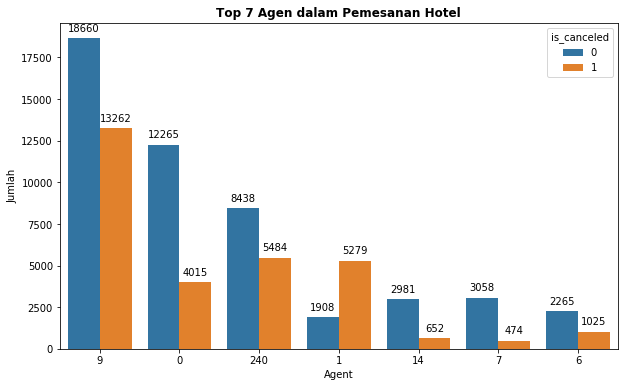

In [14]:
training.agent = training.agent.astype(int)
plt.figure(figsize=(10, 6))
splot = sns.countplot('agent', hue='is_canceled', data=training, order=training.agent.value_counts().iloc[:7].index)

plt.title('Top 7 Agen dalam Pemesanan Hotel', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Agent')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

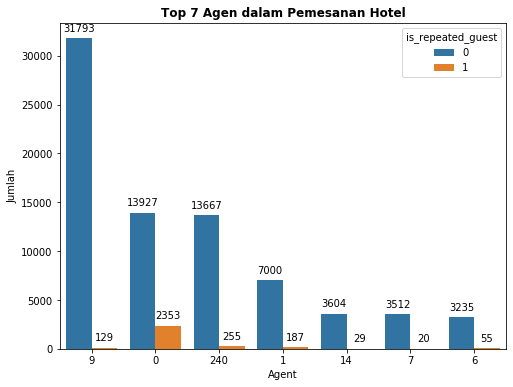

In [15]:
training.agent = training.agent.astype(int)
plt.figure(figsize=(8, 6))
splot = sns.countplot('agent', hue='is_repeated_guest', data=training, order=training.agent.value_counts().iloc[:7].index)

plt.title('Top 7 Agen dalam Pemesanan Hotel', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Agent')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [16]:
is_repeated_guest_count = training.is_repeated_guest.value_counts()
is_repeated_guest_count

0    115455
1      3755
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Perbandingan Persentase Repeated Guests')

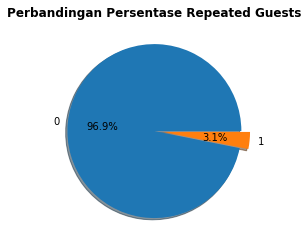

In [17]:
explode = (0, 0.1)
plt.pie(is_repeated_guest_count.values, labels=is_repeated_guest_count.index, autopct='%1.1f%%',
        shadow=True, explode=explode)
plt.title('Perbandingan Persentase Repeated Guests', fontweight='bold')

### 2. ArrivalDateMonth

In [18]:
training.arrival_date_month.value_counts()

August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

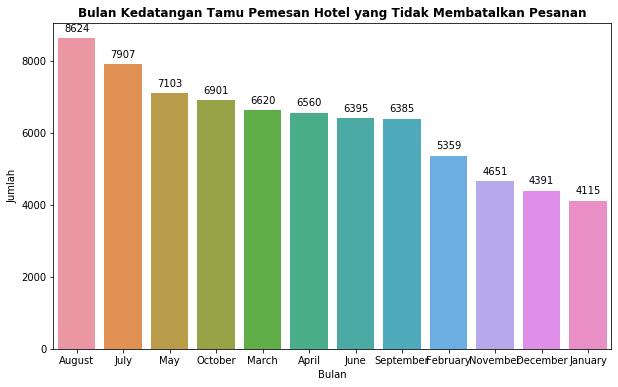

In [19]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('arrival_date_month', data=training_nc, order=training_nc.arrival_date_month.value_counts().index)

plt.title('Bulan Kedatangan Tamu Pemesan Hotel yang Tidak Membatalkan Pesanan', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Bulan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

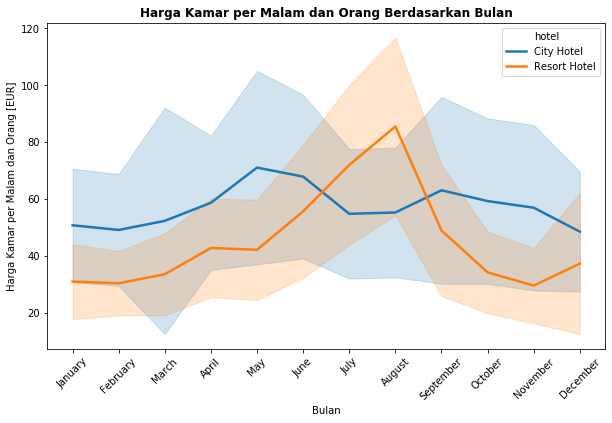

In [20]:
room_prices_monthly = training[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], 
                                                           categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(10, 6))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_monthly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Harga Kamar per Malam dan Orang Berdasarkan Bulan", fontweight='bold')
plt.xlabel("Bulan")
plt.xticks(rotation=45)
plt.ylabel("Harga Kamar per Malam dan Orang [EUR]")
plt.show()

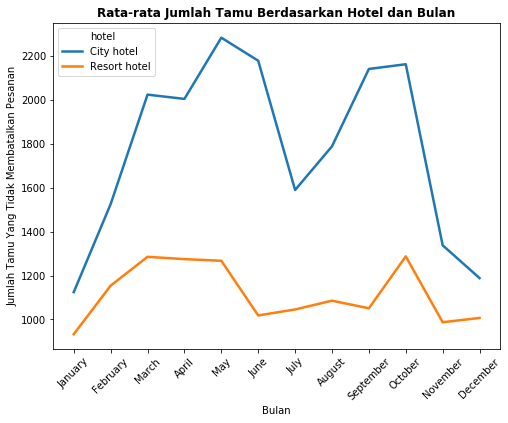

In [21]:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(8, 6))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Rata-rata Jumlah Tamu Berdasarkan Hotel dan Bulan", fontweight='bold')
plt.xlabel("Bulan")
plt.xticks(rotation=45)
plt.ylabel("Jumlah Tamu Yang Tidak Membatalkan Pesanan")
plt.show()

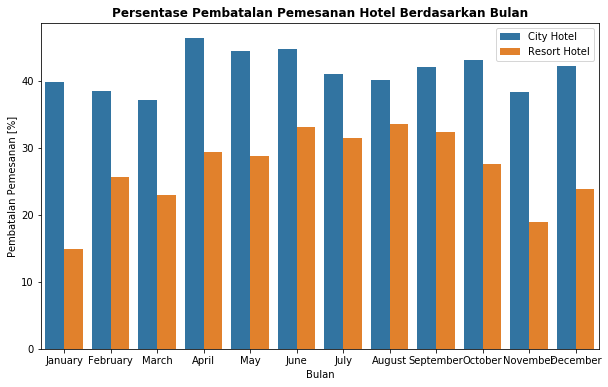

In [22]:
# Create a DateFrame with the relevant data:
res_book_per_month = training.loc[(training["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = training.loc[(training["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = training.loc[(training["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = training.loc[(training["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(10, 6))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Persentase Pembatalan Pemesanan Hotel Berdasarkan Bulan", fontweight='bold')
plt.xlabel("Bulan")
plt.ylabel("Pembatalan Pemesanan [%]")
plt.legend(loc="upper right")
plt.show()

### 3. ReservedRoomType & AssignedRoomType

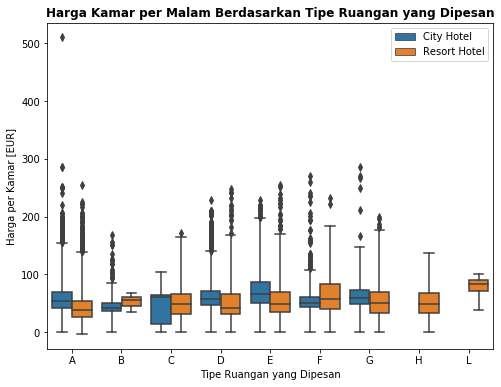

In [23]:
full_data_guests = training.loc[training["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# barplot with standard deviation:
plt.figure(figsize=(8, 6))
sns.boxplot(x = "reserved_room_type", y="adr_pp", hue="hotel", data=room_prices, 
            hue_order = ["City Hotel", "Resort Hotel"], whis=3)
plt.title("Harga Kamar per Malam Berdasarkan Tipe Ruangan yang Dipesan", fontweight='bold')
plt.xlabel("Tipe Ruangan yang Dipesan")
plt.ylabel("Harga per Kamar [EUR]")
plt.legend(loc="upper right")
plt.show()

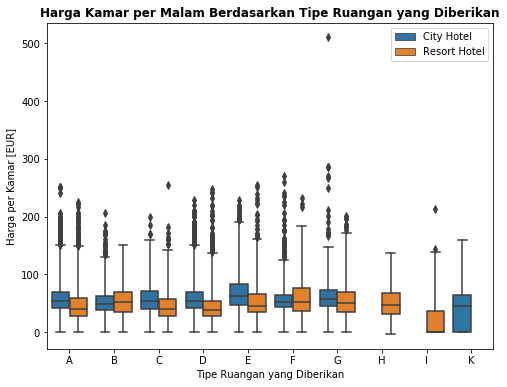

In [24]:
room_prices = full_data_guests[["hotel", "assigned_room_type", "adr_pp"]].sort_values("assigned_room_type")

# barplot with standard deviation:
plt.figure(figsize=(8, 6))
sns.boxplot(x = "assigned_room_type", y="adr_pp", hue="hotel", data=room_prices, 
            hue_order = ["City Hotel", "Resort Hotel"], whis=3)
plt.title("Harga Kamar per Malam Berdasarkan Tipe Ruangan yang Diberikan", fontweight='bold')
plt.xlabel("Tipe Ruangan yang Diberikan")
plt.ylabel("Harga per Kamar [EUR]")
plt.legend(loc="upper right")
plt.show()

In [25]:
full_data_guests = training.loc[training["is_canceled"] == 0]
fdg_assigned_beda_reserved = full_data_guests[full_data_guests.reserved_room_type != full_data_guests.assigned_room_type]
fdg_assigned_beda_reserved

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,240,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,48.500000
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,240,0.0,0,Transient,97.00,0,3,Check-Out,2015-07-05,48.500000
17,Resort Hotel,0,12,2015,July,27,1,0,1,2,...,240,0.0,0,Transient,88.20,0,0,Check-Out,2015-07-02,44.100000
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,...,0,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02,53.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119093,City Hotel,0,213,2017,August,35,28,1,3,1,...,19,0.0,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01,104.000000
119094,City Hotel,0,213,2017,August,35,28,1,3,1,...,19,0.0,0,Transient-Party,104.00,0,0,Check-Out,2017-09-01,104.000000
119109,City Hotel,0,25,2017,August,35,30,0,3,3,...,9,0.0,0,Transient,236.33,0,3,Check-Out,2017-09-02,78.776667
119117,City Hotel,0,332,2017,August,35,31,0,2,2,...,9,0.0,0,Transient,170.80,0,2,Check-Out,2017-09-02,85.400000


In [26]:
a = fdg_assigned_beda_reserved.is_canceled.value_counts()
b = fdg_assigned_beda_reserved.hotel.value_counts()
c = fdg_assigned_beda_reserved.is_repeated_guest.value_counts()
d = fdg_assigned_beda_reserved.meal.value_counts()

In [27]:
def pie_plot_annotation(variabel, ax_X, ax_Y, title):
    axes[ax_X, ax_Y].pie(variabel.values, labels = variabel.index, autopct='%1.1f%%', shadow=True)
    axes[ax_X, ax_Y].set_title(title, fontweight='bold', fontsize=10)

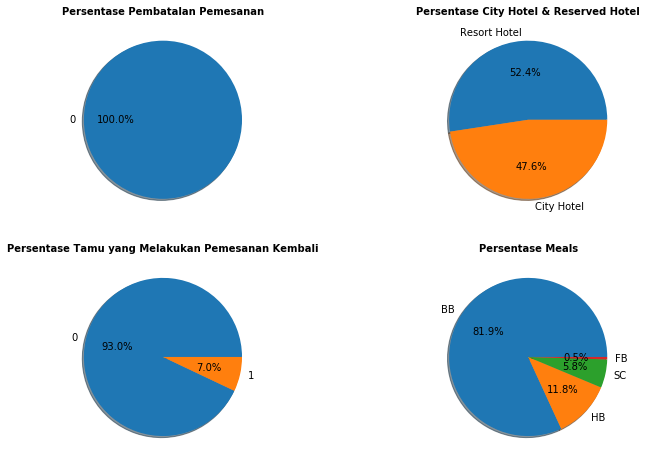

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
pie_plot_annotation(a, 0, 0, 'Persentase Pembatalan Pemesanan')
pie_plot_annotation(b, 0, 1, 'Persentase City Hotel & Reserved Hotel')
pie_plot_annotation(c, 1, 0, 'Persentase Tamu yang Melakukan Pemesanan Kembali')
pie_plot_annotation(d, 1, 1, 'Persentase Meals')

### 4. Company

In [29]:
training[training.is_canceled == 0].company.value_counts()

0.0      69424
40.0       847
223.0      665
45.0       221
153.0      165
         ...  
85.0         1
142.0        1
305.0        1
64.0         1
417.0        1
Name: company, Length: 330, dtype: int64

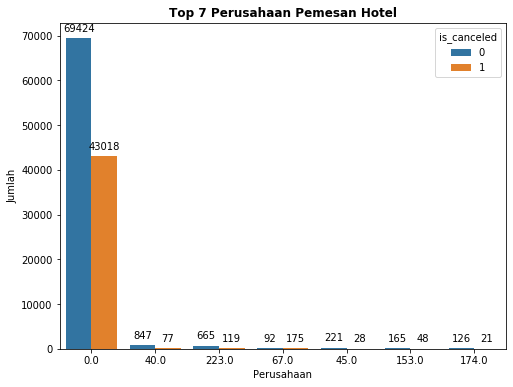

In [30]:
plt.figure(figsize=(8, 6))
splot = sns.countplot('company', hue='is_canceled', data=training, 
                      order=training.company.value_counts().iloc[:7].index)

plt.title('Top 7 Perusahaan Pemesan Hotel', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Perusahaan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

### 5. Country

In [31]:
country_data = pd.DataFrame(training.loc[training["is_canceled"] == 0]["country"].value_counts())
country_data.index.name = "country"
country_data.rename(columns={"country": "Jumlah Tamu"}, inplace=True)
total_guests = country_data["Jumlah Tamu"].sum()
country_data["Tamu dalam %"] = round(country_data["Jumlah Tamu"] / total_guests * 100, 2)
country_data.head(10)

,Jumlah Tamu,Tamu dalam %
country,,
PRT,20977,27.97
GBR,9668,12.89
FRA,8468,11.29
ESP,6383,8.51
DEU,6067,8.09
IRL,2542,3.39
ITA,2428,3.24
BEL,1868,2.49
NLD,1716,2.29


In [32]:
country_data['Tamu dalam %'][:10,]

country
PRT    27.97
GBR    12.89
FRA    11.29
ESP     8.51
DEU     8.09
IRL     3.39
ITA     3.24
BEL     2.49
NLD     2.29
USA     2.12
Name: Tamu dalam %, dtype: float64

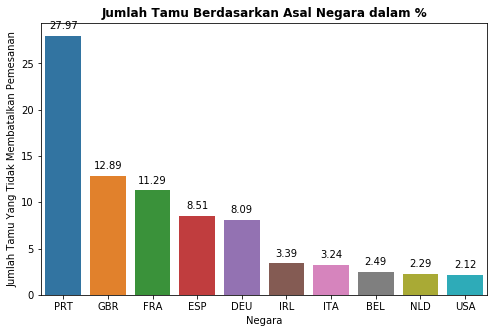

In [33]:
plt.figure(figsize=(8, 5))
splot = sns.barplot(x = country_data.index[:10,], y = country_data['Tamu dalam %'][:10,])
plt.title("Jumlah Tamu Berdasarkan Asal Negara dalam %", fontweight='bold')
plt.xlabel("Negara")
plt.ylabel("Jumlah Tamu Yang Tidak Membatalkan Pemesanan")
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

### 6. Customer Type

In [34]:
a = training.customer_type.value_counts()

Text(0.5, 1.0, 'Persentase Jenis-jenis Customer')

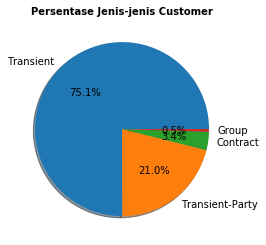

In [35]:
plt.pie(a.values, labels = a.index, autopct='%1.1f%%', shadow=True)
plt.title('Persentase Jenis-jenis Customer', fontweight='bold', fontsize=10)

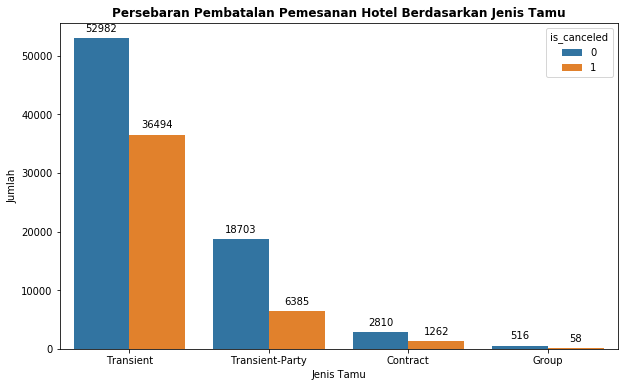

In [36]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('customer_type', hue='is_canceled', data=training, order=training.customer_type.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Jenis Tamu', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Tamu')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

### 7. Deposit Type

Text(0.5, 1.0, 'Persentase Jenis-jenis Deposit')

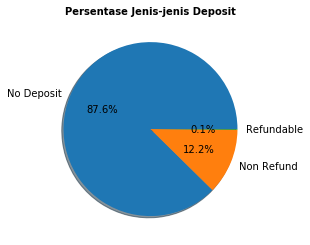

In [37]:
a = training.deposit_type.value_counts()
plt.pie(a.values, labels = a.index, autopct='%1.1f%%', shadow=True)
plt.title('Persentase Jenis-jenis Deposit', fontweight='bold', fontsize=10)

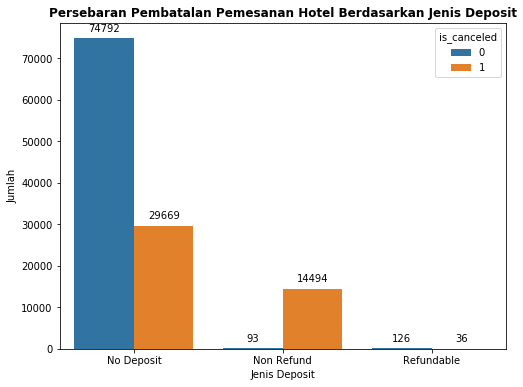

In [38]:
plt.figure(figsize=(8, 6))
splot = sns.countplot('deposit_type', hue='is_canceled', data=training, order=training.deposit_type.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Jenis Deposit', fontweight='bold')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Deposit')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

### 8. Distribution Channel

In [39]:
training.distribution_channel.value_counts()

TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

Text(0.5, 1.0, 'Persentase Jenis-jenis Jaringan Distribusi')

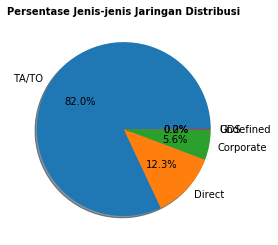

In [40]:
a = training.distribution_channel.value_counts()
plt.pie(a.values, labels = a.index, autopct='%1.1f%%', shadow=True)
plt.title('Persentase Jenis-jenis Jaringan Distribusi', fontweight='bold', fontsize=10)

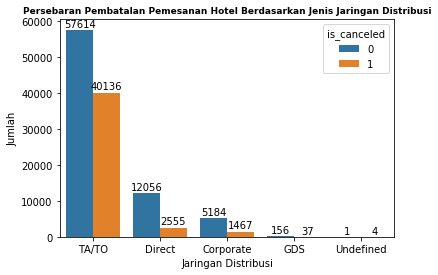

In [41]:
plt.figure(figsize=(6, 4))
splot = sns.countplot('distribution_channel', hue='is_canceled', data=training, 
                      order=training.distribution_channel.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Jenis Jaringan Distribusi', fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Jaringan Distribusi')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 9. IsRepeatedGuest

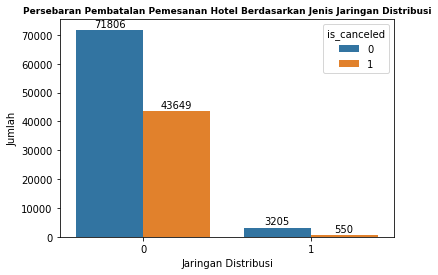

In [42]:
plt.figure(figsize=(6, 4))
splot = sns.countplot('is_repeated_guest', hue='is_canceled', data=training, 
                      order=training.is_repeated_guest.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Jenis Jaringan Distribusi', fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Jaringan Distribusi')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 10. Market Segment

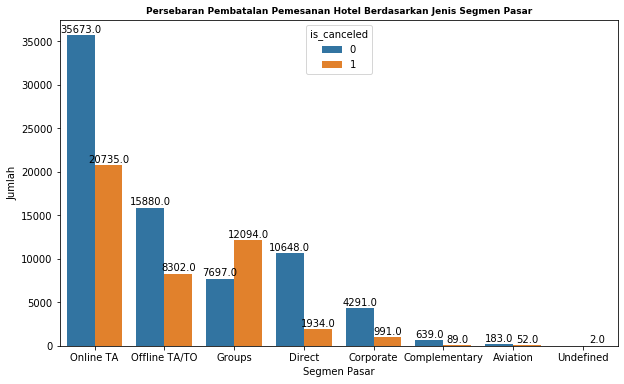

In [43]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('market_segment', hue='is_canceled', data=training, 
                      order=training.market_segment.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Jenis Segmen Pasar', fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Segmen Pasar')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

Text(0.5, 1.0, 'Persebaran Repeated Guest Berdasarkan Segmen Pasar')

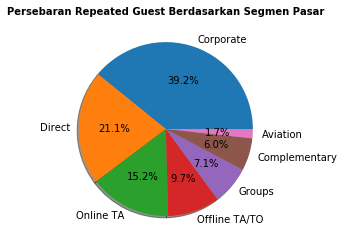

In [44]:
rg = training[training.is_repeated_guest == 1]
a = rg.market_segment.value_counts()
plt.pie(a.values, labels = a.index, autopct='%1.1f%%', shadow=True)
plt.title('Persebaran Repeated Guest Berdasarkan Segmen Pasar', fontweight='bold', fontsize=10)

### 11. Meal

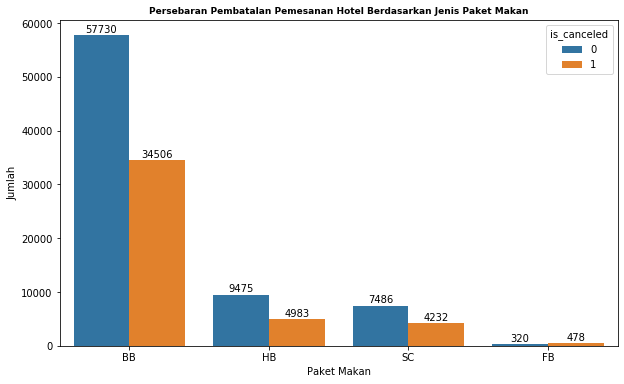

In [45]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('meal', hue='is_canceled', data=training, 
                      order=training.meal.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Jenis Paket Makan', fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Paket Makan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 12. Reservation Status

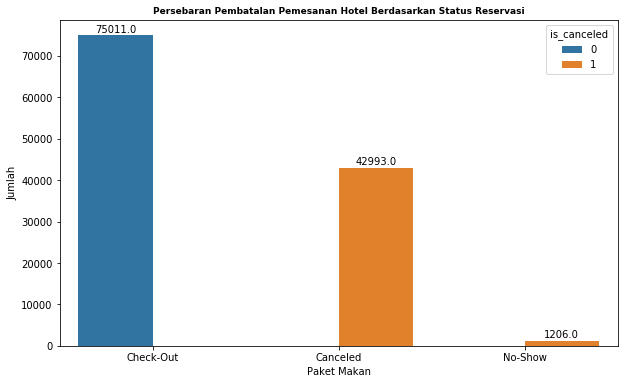

In [46]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('reservation_status', hue='is_canceled', data=training, 
                      order=training.reservation_status.value_counts().index)

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Status Reservasi', fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Paket Makan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 13. ADR

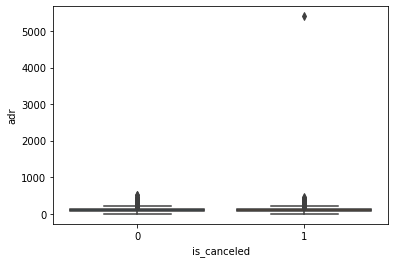

In [47]:
sns.boxplot(x="is_canceled", y="adr", data=training)

In [48]:
training_no_ol = training[training.adr > 5000]
training_no_ol

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
48491,City Hotel,1,35,2016,March,13,25,0,1,2,...,12,0.0,0,Transient,5400.0,0,0,Canceled,2016-02-19,2700.0


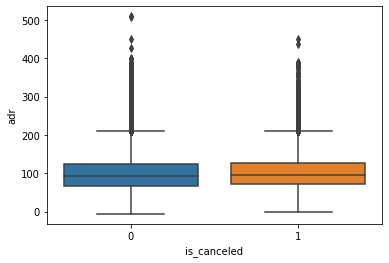

In [49]:
sns.boxplot(x="is_canceled", y="adr", data=training[training.adr < 5000])

### 14. Total Guest

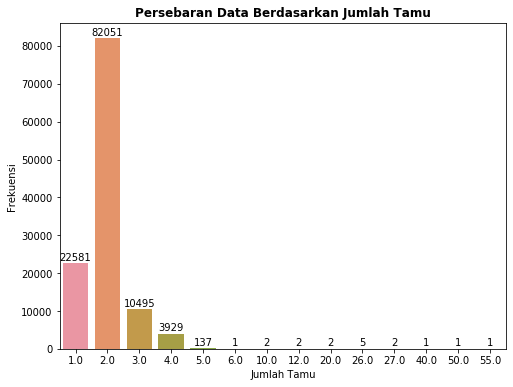

In [50]:
training['total_guests'] = training['adults']+ training['children']+ training['babies']
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="total_guests", data = training)
plt.title('Persebaran Data Berdasarkan Jumlah Tamu', fontweight='bold')
plt.xlabel('Jumlah Tamu')
plt.ylabel('Frekuensi')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

### 15. Arrival Date of Month

### 16. Arrival Date Week Number

### 17. Arrival Date of Year

### 18. Booking Changes

### 19. Days in Waiting List

In [51]:
training.days_in_waiting_list.value_counts()

0      115517
39        227
58        164
44        141
31        127
        ...  
37          1
109         1
52          1
72          1
74          1
Name: days_in_waiting_list, Length: 127, dtype: int64

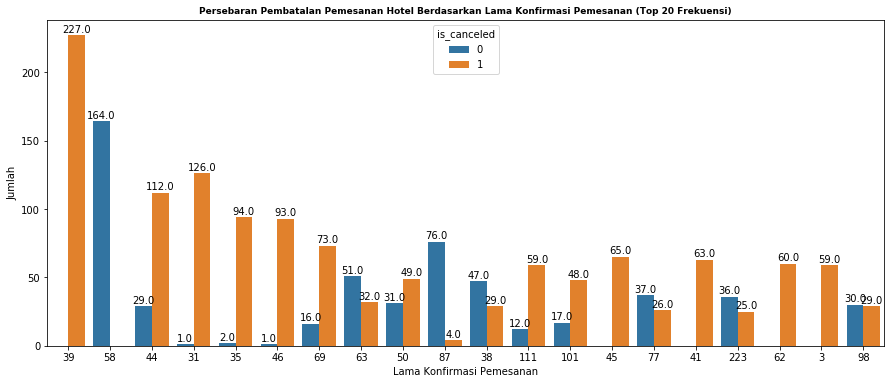

In [52]:
plt.figure(figsize=(15, 6))
splot = sns.countplot('days_in_waiting_list', hue='is_canceled', data=training[training.days_in_waiting_list > 0], 
                      order=training.days_in_waiting_list.value_counts().index[1:21,])

plt.title('Persebaran Pembatalan Pemesanan Hotel Berdasarkan Lama Konfirmasi Pemesanan (Top 20 Frekuensi)', 
          fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Lama Konfirmasi Pemesanan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

In [53]:
a = training[(training.days_in_waiting_list == 58) | (training.days_in_waiting_list == 87)]

In [54]:
a[a.arrival_date_month == 'October'].arrival_date_day_of_month.value_counts()

28    75
25    75
7     14
Name: arrival_date_day_of_month, dtype: int64

In [55]:
a[a.arrival_date_month == 'November'].arrival_date_day_of_month.value_counts()

18    77
17     3
Name: arrival_date_day_of_month, dtype: int64

Text(0.5, 1.0, 'Negara Asal')

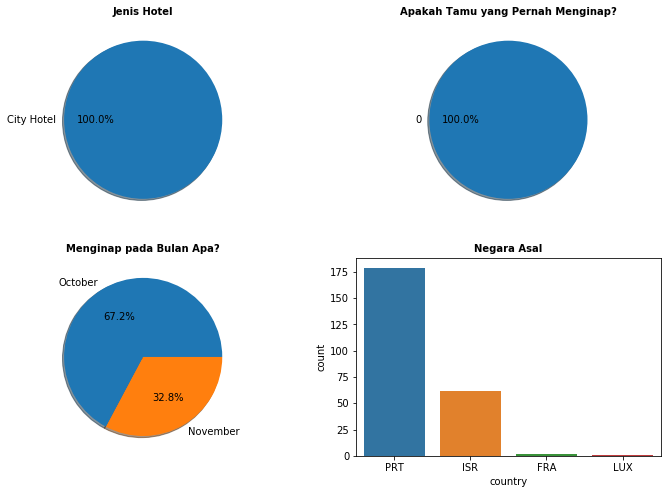

In [56]:
b = a.hotel.value_counts()
c = a.is_repeated_guest.value_counts()
d = a.arrival_date_month.value_counts()
e = a.country.value_counts()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
pie_plot_annotation(b, 0, 0, 'Jenis Hotel')
pie_plot_annotation(c, 0, 1, 'Apakah Tamu yang Pernah Menginap?')
pie_plot_annotation(d, 1, 0, 'Menginap pada Bulan Apa?')
sns.countplot(a.country, ax=axes[1, 1])
plt.title('Negara Asal', fontweight='bold', fontsize=10)

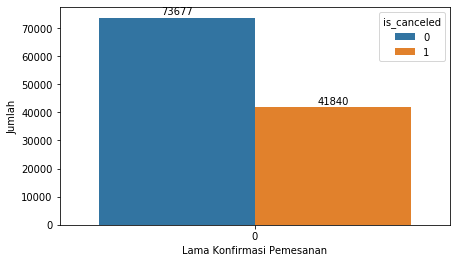

In [57]:
plt.figure(figsize=(7, 4))
splot = sns.countplot('days_in_waiting_list', hue='is_canceled', data=training[training.days_in_waiting_list == 0])
plt.ylabel('Jumlah')
plt.xlabel('Lama Konfirmasi Pemesanan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 20. Lead Time

In [58]:
training.lead_time.value_counts()

0      6264
1      3445
2      2065
3      1815
4      1710
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

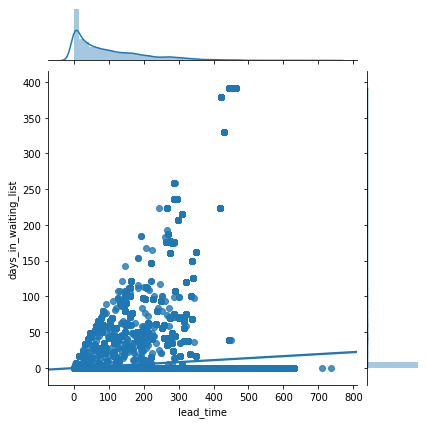

In [59]:
sns.jointplot("lead_time", "days_in_waiting_list", data=training, kind="reg")

Text(0.5, 1.0, 'Box Plot Lead Time Berdasarkan Status Pembatalan Pemesanan Hotel')

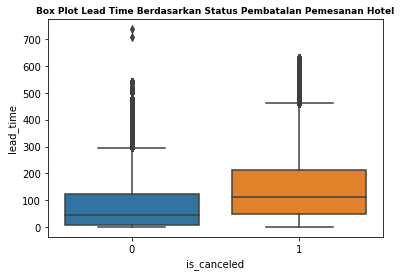

In [60]:
sns.boxplot(x="is_canceled", y="lead_time", data=training)
plt.title('Box Plot Lead Time Berdasarkan Status Pembatalan Pemesanan Hotel', fontweight='bold', fontsize=9)

### 21. Previous Bookings Not Canceled & Previous Cancellations

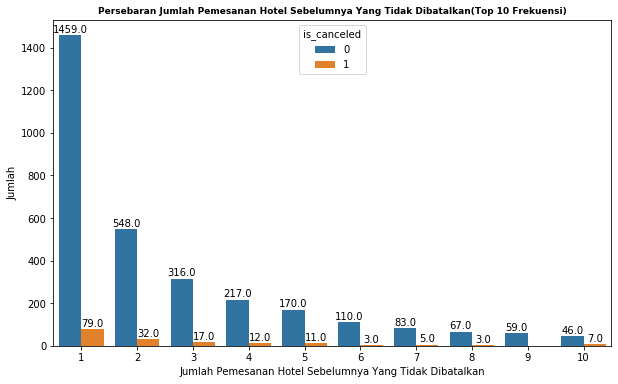

In [61]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('previous_bookings_not_canceled', hue='is_canceled', data=training, 
                      order=training.previous_bookings_not_canceled.value_counts().index[1:11,])

plt.title('Persebaran Jumlah Pemesanan Hotel Sebelumnya Yang Tidak Dibatalkan(Top 10 Frekuensi)', 
          fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Jumlah Pemesanan Hotel Sebelumnya Yang Tidak Dibatalkan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

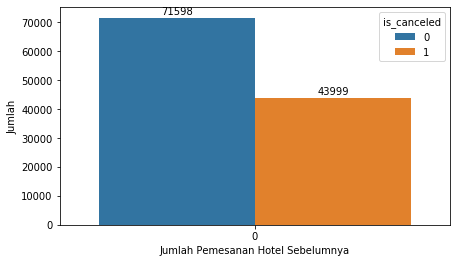

In [62]:
plt.figure(figsize=(7, 4))
splot = sns.countplot('previous_bookings_not_canceled', hue='is_canceled', 
                      data=training[training.previous_bookings_not_canceled == 0])
plt.ylabel('Jumlah')
plt.xlabel('Jumlah Pemesanan Hotel Sebelumnya')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

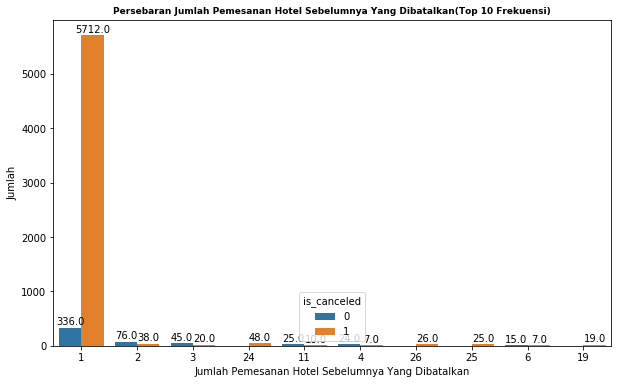

In [63]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('previous_cancellations', hue='is_canceled', data=training, 
                      order=training.previous_cancellations.value_counts().index[1:11,])

plt.title('Persebaran Jumlah Pemesanan Hotel Sebelumnya Yang Dibatalkan(Top 10 Frekuensi)', 
          fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Jumlah Pemesanan Hotel Sebelumnya Yang Dibatalkan')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

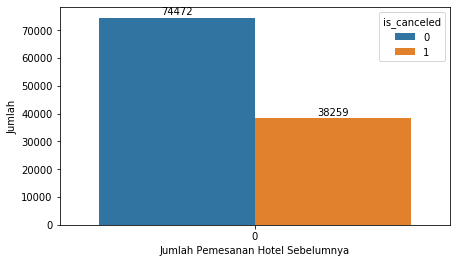

In [64]:
plt.figure(figsize=(7, 4))
splot = sns.countplot('previous_cancellations', hue='is_canceled', 
                      data=training[training.previous_cancellations == 0])
plt.ylabel('Jumlah')
plt.xlabel('Jumlah Pemesanan Hotel Sebelumnya')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 22. Required Car Parking Spaces

In [65]:
training.required_car_parking_spaces.value_counts()

0    111801
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

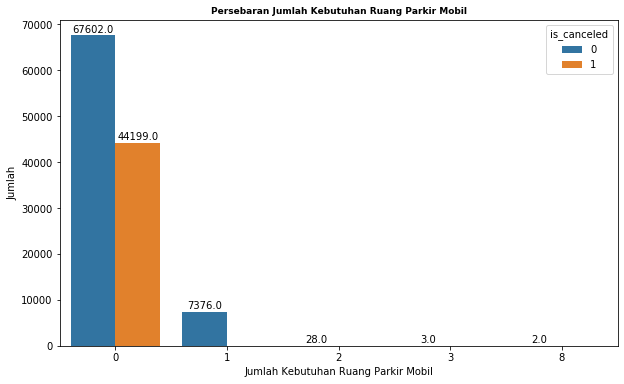

In [66]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('required_car_parking_spaces', hue='is_canceled', data=training, 
                      order=training.required_car_parking_spaces.value_counts().index)

plt.title('Persebaran Jumlah Kebutuhan Ruang Parkir Mobil', 
          fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Jumlah Kebutuhan Ruang Parkir Mobil')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

### 23. Stays In Weekend Nights & Stays In Week Nights

In [67]:
training.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_pp',
       'total_guests'],
      dtype='object')

In [68]:
training.stays_in_week_nights.value_counts()

2     33670
1     30292
3     22241
5     11068
4      9543
0      7572
6      1494
10     1030
7      1024
8       654
9       228
15       85
11       55
19       43
12       42
20       39
14       35
13       27
16       15
21       15
22        7
18        6
25        6
17        4
30        4
24        3
40        2
42        1
26        1
32        1
33        1
34        1
50        1
Name: stays_in_week_nights, dtype: int64

In [69]:
training.stays_in_weekend_nights.value_counts()

0     51895
2     33266
1     30615
4      1847
3      1252
6       152
5        77
8        58
7        19
9        10
10        7
12        5
13        2
16        2
18        1
14        1
19        1
Name: stays_in_weekend_nights, dtype: int64

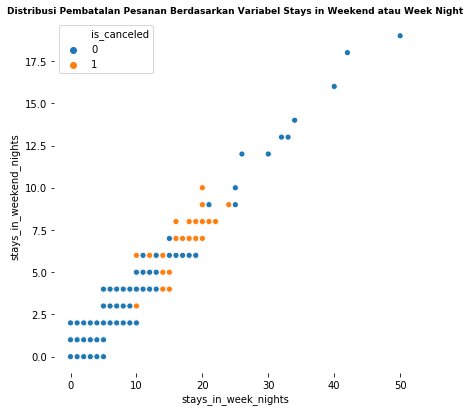

In [70]:
#scatter plot
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot("stays_in_week_nights", "stays_in_weekend_nights", hue='is_canceled', data=training)
plt.title('Distribusi Pembatalan Pesanan Berdasarkan Variabel Stays in Weekend atau Week Night', 
          fontweight='bold', fontsize=9)
plt.show()

### 24. Total Of Special Requests

In [71]:
training.total_of_special_requests.value_counts()

0    70201
1    33183
2    12952
3     2494
4      340
5       40
Name: total_of_special_requests, dtype: int64

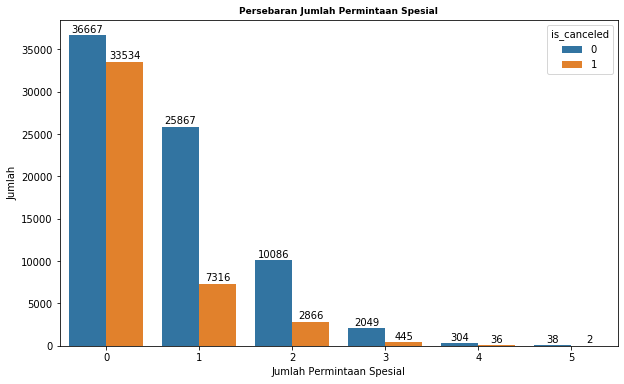

In [72]:
plt.figure(figsize=(10, 6))
splot = sns.countplot('total_of_special_requests', hue='is_canceled', data=training, 
                      order=training.total_of_special_requests.value_counts().index)

plt.title('Persebaran Jumlah Permintaan Spesial', 
          fontweight='bold', fontsize=9)
plt.ylabel('Jumlah')
plt.xlabel('Jumlah Permintaan Spesial')
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')
plt.show()

## Membuat Model Prediksi

### 1. Feature Engineering

In [73]:
training = pd.read_csv('D:/Dataset/findit/hotel_bookings.csv')
#training[training.duplicated(keep=False)]
#training = training[training.adr > 5000]

#solving missing value
training.children.fillna(value=0.0, inplace=True)
training.company.fillna(value=0.0, inplace=True)
training.agent.fillna(value=0.0, inplace=True)
training.country.fillna(value='Unknown', inplace=True)
training["meal"].replace("Undefined", "SC", inplace=True)

training['total_guests'] = training['adults']+ training['children']+ training['babies']

In [74]:
training.lead_time = np.sqrt(training.lead_time)
training.adr = np.sqrt(training.adr)

In [75]:
target = training.is_canceled
cat_features = [
    'hotel', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 
    'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type'
]
numeric_features = [
    'adults', 'children', 'babies', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations',
    'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces',
    'total_guests', 'total_of_special_requests', 'lead_time', 'days_in_waiting_list'
]
training.drop(['arrival_date_year', 'reservation_status_date', 
               'booking_changes', 'reservation_status'], axis=1, inplace=True)

In [76]:
for feature in cat_features:
    a = pd.get_dummies(training[feature], prefix = feature)
    frames = [training, a]
    training = pd.concat(frames, axis = 1)
    
training.drop(cat_features, axis = 1, inplace=True)
training

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,...,company_530.0,company_531.0,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,18.493242,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,27.147744,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.645751,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,3.605551,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,3.741657,0,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,4.795832,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119386,0,10.099505,2,5,3,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119387,0,5.830952,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119388,0,10.440307,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
scaler = StandardScaler()
training[numeric_features] = scaler.fit_transform(training[numeric_features])

In [78]:
train = training.drop("is_canceled", axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state = 123)
kfold = KFold(n_splits=5, random_state=1234, shuffle = True)

### 2. Modelling

In [79]:
xgboost_model = XGBClassifier()
knn_model = KNeighborsClassifier() 
rfc_model = RandomForestClassifier()
dtc_model = DecisionTreeClassifier()
all_model = [xgboost_model, knn_model, rfc_model, dtc_model]

In [80]:
# for model in all_model:
#     print(cross_validate(estimator=model, X=X_train, y=y_train, cv=kfold, scoring='f1_macro'))
#     print('\n')

In [81]:
# model_score = []
# for model in all_model:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     f_score = f1_score(y_test, y_pred, average='macro')
#     accuracy = accuracy_score(y_test, y_pred)
#     model_score.append([model.__class__.__name__, f_score, accuracy])
#     print("Metode {}".format(model.__class__.__name__))
#     print('Score F1-Macro = ', f_score, ', Accuracy = ', accuracy)
#     tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
#     print('TN:', tn, '\nFP:',fp, '\nFN:', fn, '\nTP:', tp)
#     print('\n')

### 3.Hyperparameter Tuning
***

Hyperparameter tuning dilakukan secara empiris.

In [82]:
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f_score = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f_score, accuracy

(0.8825700341651572, 0.8914900745456068)

In [83]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, test_prediction)


In [84]:
prediction = model.predict(train)
acc = accuracy_score(target, prediction)
acc

0.9749895301113997

In [85]:
prediction = pd.Series(prediction)
prediction.to_csv('prediction.csv')

In [86]:
# lr = [0.1, 0.3, 0.5, 0.7, 0.9]
# n = [25, 100, 125, 150, 200]
# depths = [25, 100, 125, 150, 200]

# for i in lr:
#     for j in n:
#         for depth in depths:
#             model = XGBClassifier(learning_rate=i, n_estimators=j, max_depth=depth)
#             model.fit(X_train, y_train)
#             y_pred = model.predict(X_test)
#             f_score = f1_score(y_test, y_pred, average='macro')
#             print('Kalau learning_rate =', i, 
#                   ', n_estimator =', j,
#                   ', dan max_depth = ', depth, 
#                   ', maka f_score =', f_score)

In [87]:
# n = [25, 50, 75, 100, 125, 150, 200]
# depths = [5, 10, 25, 50, 75, 100, 125, 150, 200]
# for i in n:
#     for depth in depths:
#         model = RandomForestClassifier(n_estimators = i, max_depth = depth)
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         f_score = f1_score(y_test, y_pred, average='macro')
#         print('Kalau n_neighbors =', i, 'dan max_depth = ', depth, ', maka f_score =', f_score)

In [88]:
# depths = [5, 10, 25, 50, 75, 100, 125, 150, 200]
# for depth in depths:
#     DecisionTreeClassifier(max_depth = depth)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     f_score = f1_score(y_test, y_pred, average='macro')
#     print('Kalau max_depth = ', depth, ', maka f_score =', f_score)

In [89]:
# n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# for i in n:
#     model = KNeighborsClassifier(n_neighbors = i)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     f_score = f1_score(y_test, y_pred, average='macro')
#     print('Kalau n_neighbors =' i, ', maka f_score ='f_score)